# 图像增广

## 常见的方式有如下几种
- 翻转 RandomHorizontalFlip() / RandomVerticalFlip()
- 裁剪 RandomResizedCrop()
- 改变颜色 ColorJitter()

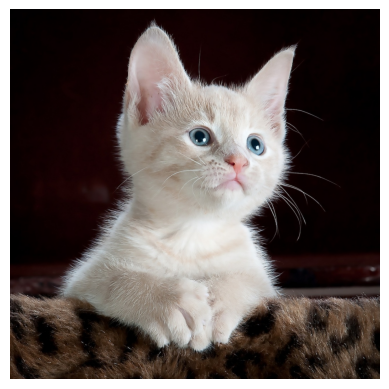

In [8]:
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
img_path = "../data/images/cat.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    figsize = (num_cols* scale, num_rows* scale)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(Y[i])
        ax.axis('off')
    fig.show()

### 翻转

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


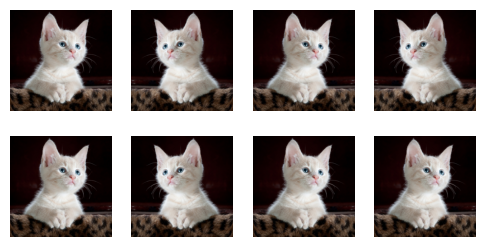

In [9]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


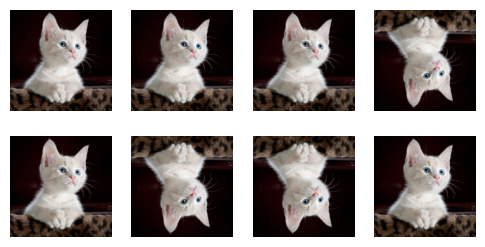

In [10]:
apply(img, torchvision.transforms.RandomVerticalFlip())

### 随机裁剪

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


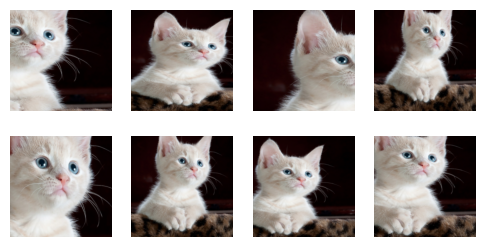

In [ ]:
# scale: 控制裁剪区域相对于原图的面积比例
# ratio: 控制裁剪区域的宽高比（aspect ratio）
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### 改变颜色

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


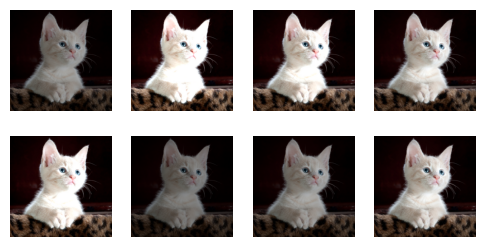

In [12]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


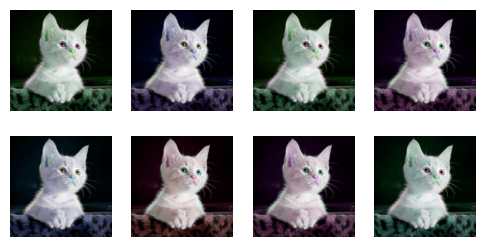

In [13]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


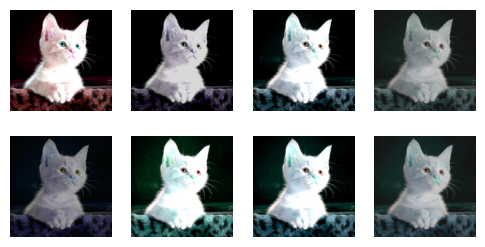

In [ ]:
# 亮度（brightness）、对比度（contrast）、饱和度（saturation）、色调（hue）
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 多种方式结合

/var/folders/kk/41l0r_8514l256trkd23wl400000gn/T/ipykernel_12237/24521354.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


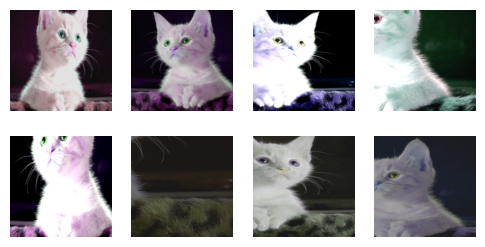

In [15]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)